# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV,cross_val_score
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### About Dataset

**Description**


This dataset provides a glimpse into credit card transactions, where each entry represents a transaction made using a credit card. The dataset is divided into two main categories: genuine transactions and fraudulent transactions. The goal is to develop a system that can automatically identify fraudulent activities, helping protect users and financial institutions from potential losses due to fraudulent transactions.

**Why it is so important?**


Detecting fraudulent transactions is crucial for maintaining the integrity of the financial system. By accurately identifying fraudulent activities, financial institutions can take immediate action to prevent unauthorized charges, safeguarding users' funds and preserving trust in the credit card system.

**Challenge**


One of the main challenges with this dataset is the inherent imbalance between genuine and fraudulent transactions. Genuine transactions are much more common than fraudulent ones, making it difficult for machine learning algorithms to learn patterns associated with fraud. Addressing this imbalance is essential to ensure that the model can effectively detect fraudulent activities without overwhelming the system with false alarms.

In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Information about Columns


**Time** : The time elapsed between the transaction and the first transaction in the dataset. This can help identify patterns based on the time of day when transactions occur.

**Amount** : The monetary value of the transaction. This column provides insight into the financial impact of each transaction.

**V1-V28** : These columns typically represent anonymized features extracted from the transaction data using techniques like Principal Component Analysis (PCA) to protect customer privacy. They may include information about the transaction, such as normalized transaction values or encoded categorical variables.

**Class** : This is the target variable indicating whether a transaction is fraudulent (1) or genuine (0). This column is used to train machine learning models to distinguish between fraudulent and genuine transactions.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Handling Null Values

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This dataset is free from any missing values.

<Axes: xlabel='Class', ylabel='count'>

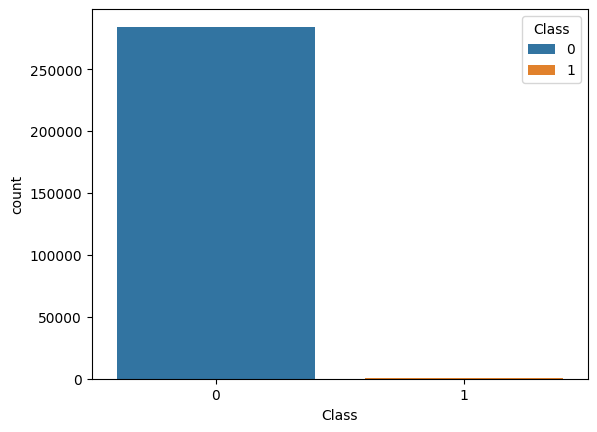

In [9]:
sns.countplot(data=df,x='Class',hue='Class')

This bar graph illustrates the distribution of our target variable, 'Class', where a value of 1 denotes a fraudulent transaction and 0 represents a non-fraudulent transaction. It's evident from the graph that the dataset exhibits a high degree of imbalance between the two classes, with significantly fewer instances of fraud compared to non-fraudulent transactions.

Non-fraudulent transactions account for 99.83% of the dataset, while fraudulent transactions make up only 0.17%

In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


### Scalling and Distribution

---

**Scaling and Distributing**

In this phase of our kernel, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

**What is a sub-Sample?**

In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

---

At the start of this notebook, we observed a significant imbalance in the original dataframe. Utilizing this unbalanced dataset could lead to the following issues:

**Overfitting** : With an imbalanced dataset, our classification models might inaccurately assume that fraud instances are rare. This can result in models that are overly confident in predicting non-fraudulent transactions and may struggle to accurately identify fraud when it occurs.

**Incorrect Correlations** : While the meaning of the "V" features is

unknown, it's essential to understand how each feature influences the outcome (fraud or non-fraud). However, an imbalanced dataframe hinders our ability to uncover the true correlations between the features and the target class. This lack of insight could lead to misleading conclusions about feature importance and model performance."

This explanation highlights the potential pitfalls of using an imbalanced dataset and emphasizes the importance of addressing imbalance to build more robust and accurate models.

---





<Axes: xlabel='Time', ylabel='Density'>

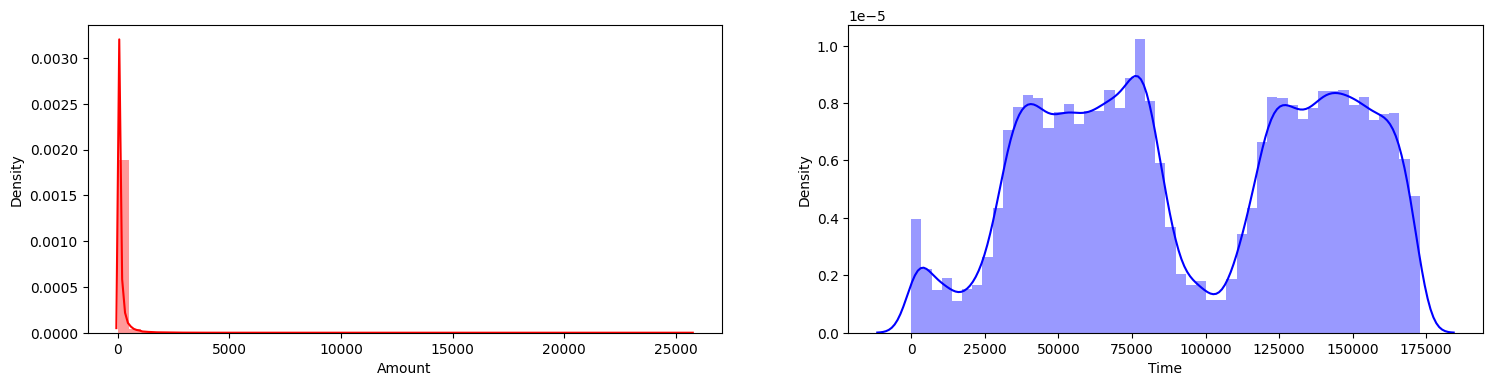

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
sns.distplot(df['Amount'], ax=ax[0], color='r')
sns.distplot(df['Time'], ax=ax[1], color='b')

In [12]:
rs=RobustScaler()

df['Amount']=rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time']=rs.fit_transform(df['Time'].values.reshape(-1,1))

In [13]:
X=df.drop('Class',axis=1)
y=df['Class']

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in stratified_kfold.split(X, y):
    original_X_train, original_X_test = X.iloc[train_index], X.iloc[test_index]
    original_y_train, original_y_test = y.iloc[train_index], y.iloc[test_index]

In [14]:
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_y_train))
print(test_counts_label/ len(original_y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Undersampling

**What is Undersampling?**


Undersampling is a technique used to balance imbalanced datasets by randomly removing instances from the majority class until the class distribution is more even. This helps prevent models from being biased towards the majority class but may lead to loss of information.

Here's how undersampling typically works:

1. **Identify the Minority Class** : First, you identify the minority class in your dataset. This is the class that has fewer instances compared to the majority class.

2. **Reduce the Majority Class** : Next, you randomly select a subset of instances from the majority class such that the number of instances in the majority class matches the number of instances in the minority class. This effectively reduces the size of the majority class.

3. **Create a Balanced Dataset** : After undersampling, you have a new dataset with a balanced class distribution, where both the minority and majority classes have roughly the same number of instances.

In [15]:
df = df.sample(frac=1)

fraud_data = df.loc[df['Class'] == 1]
non_fraud_data = df.loc[df['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])
new_df = normal_distributed_data.sample(frac=1, random_state=42)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
98395,-0.211997,-0.899969,0.052647,1.462746,-0.248840,0.678600,-0.500020,0.324690,0.177233,-0.165634,...,-0.042786,-0.269125,-0.008241,-0.041964,-0.181374,0.081242,0.049069,0.129083,0.092643,0
9509,-0.828722,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,-0.293440,1
31700,-0.566431,-5.234632,-4.764042,-0.056175,-0.542530,1.858437,-0.897501,0.516068,-1.249446,0.506223,...,-1.418369,0.128081,-0.012834,-0.098919,-0.635923,0.797346,-1.009910,1.633478,2.948089,0
100623,-0.201142,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,7.364773,1
52584,-0.459956,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,...,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,-0.293440,1


<Axes: xlabel='Class', ylabel='count'>

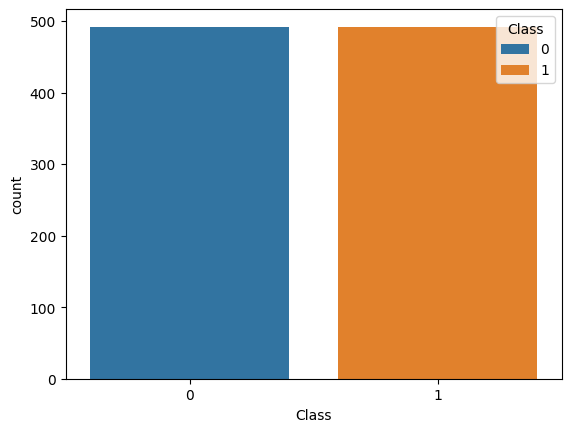

In [16]:
sns.countplot(data=new_df,x='Class',hue='Class')

Here, we've achieved a balanced dataset through undersampling.

### Checking Correlation

<Axes: >

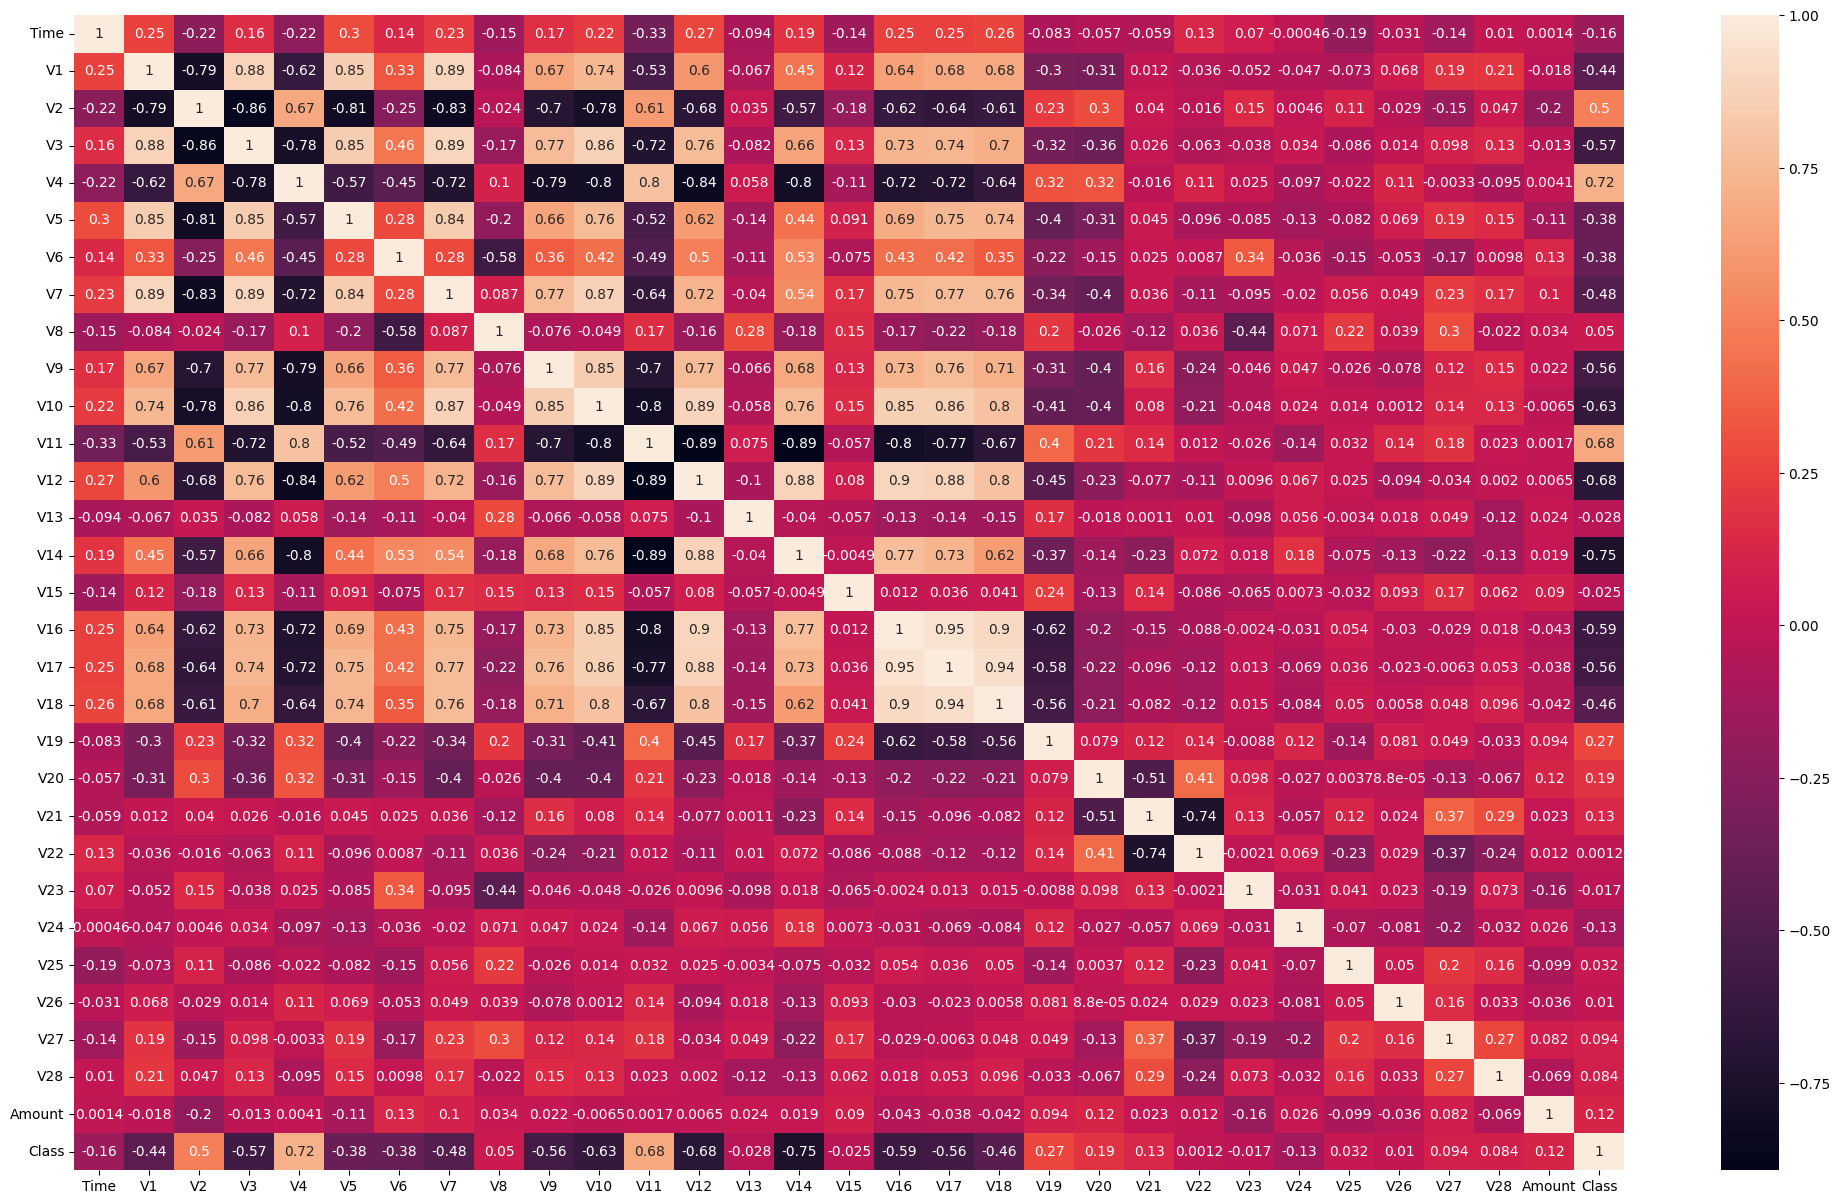

In [17]:
plt.figure(figsize=(25,15))
sns.heatmap(new_df.corr(), annot=True)

In [18]:
df.corr()["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

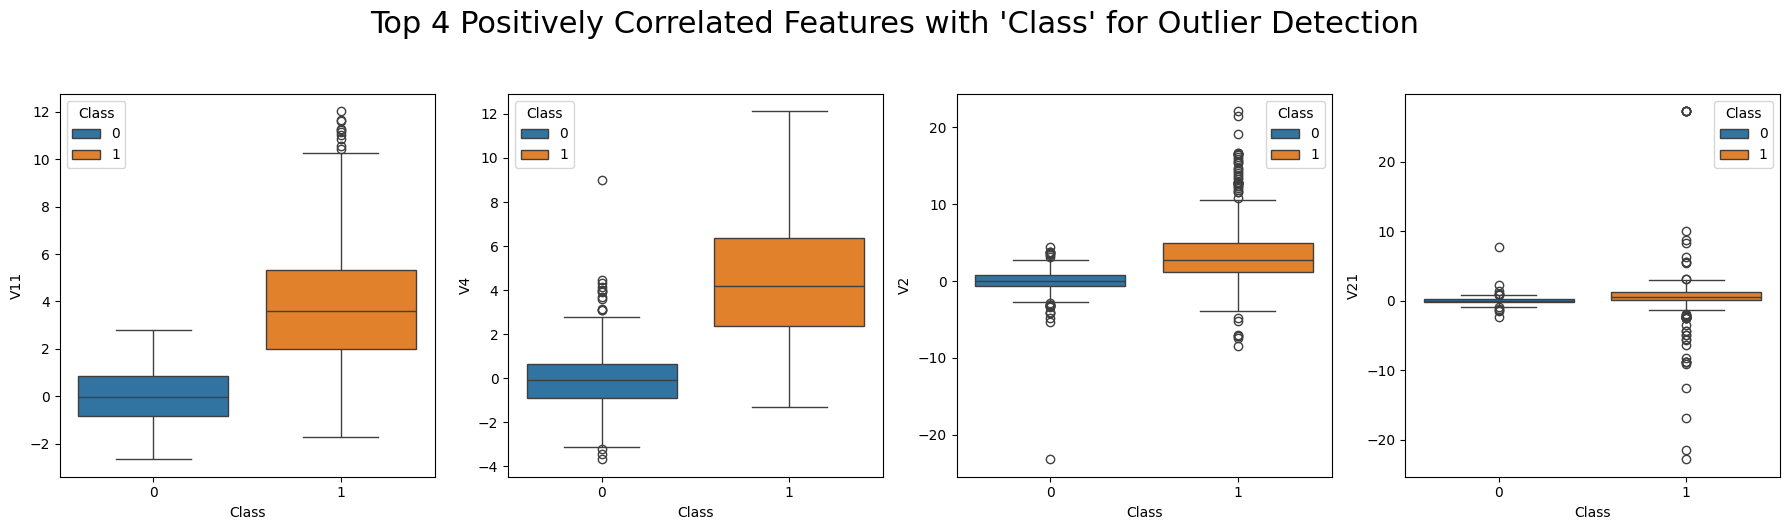

In [19]:
fig, axes = plt.subplots(1,4,figsize=(18,5))

for i,data in enumerate(new_df[['V11','V4','V2','V21']]):
  sns.boxplot(x=new_df['Class'],y=new_df[data],ax=axes[i],hue=new_df['Class'])

plt.suptitle("Top 4 Positively Correlated Features with 'Class' for Outlier Detection", x=0.5, y=1.05, ha='center', fontsize=22)
plt.tight_layout()
plt.show()

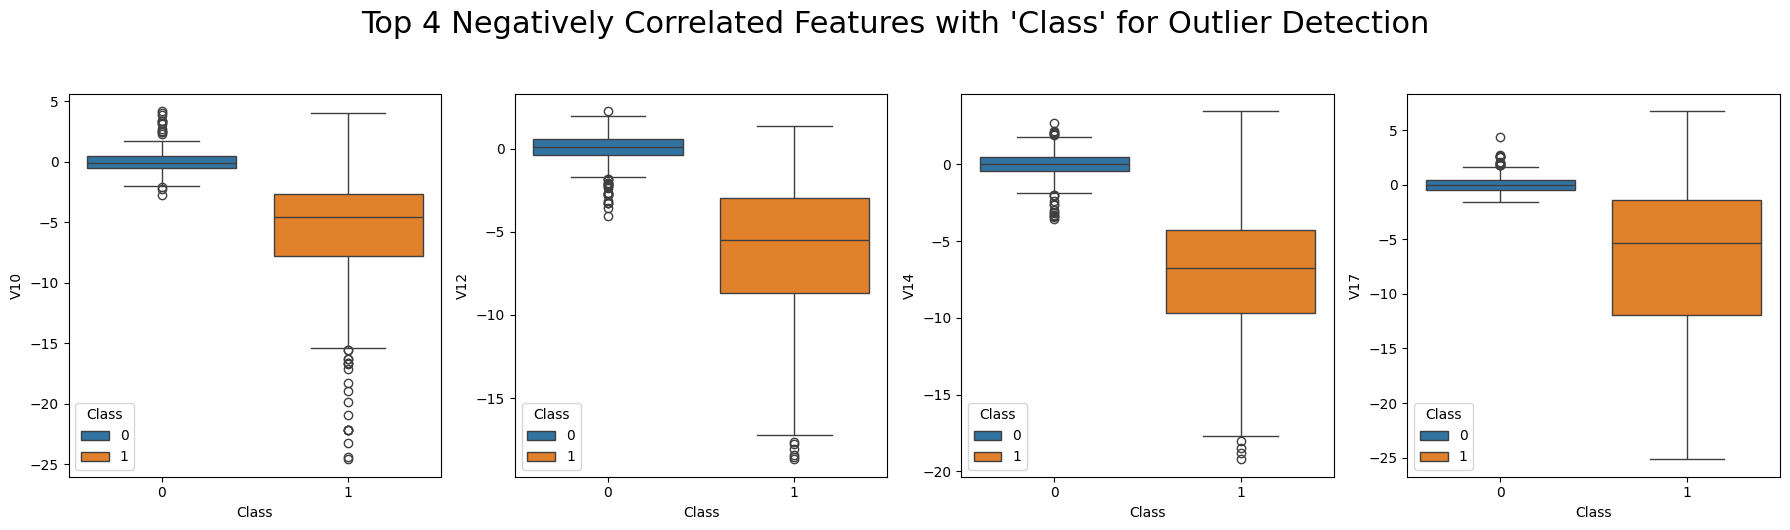

In [20]:
fig, axes = plt.subplots(1,4,figsize=(18,5))

for i,data in enumerate(new_df[['V10','V12','V14','V17']]):
  sns.boxplot(x=new_df['Class'],y=new_df[data],ax=axes[i],hue=new_df['Class'])

plt.suptitle("Top 4 Negatively Correlated Features with 'Class' for Outlier Detection", x=0.5, y=1.05, ha='center', fontsize=22)
plt.tight_layout()
plt.show()

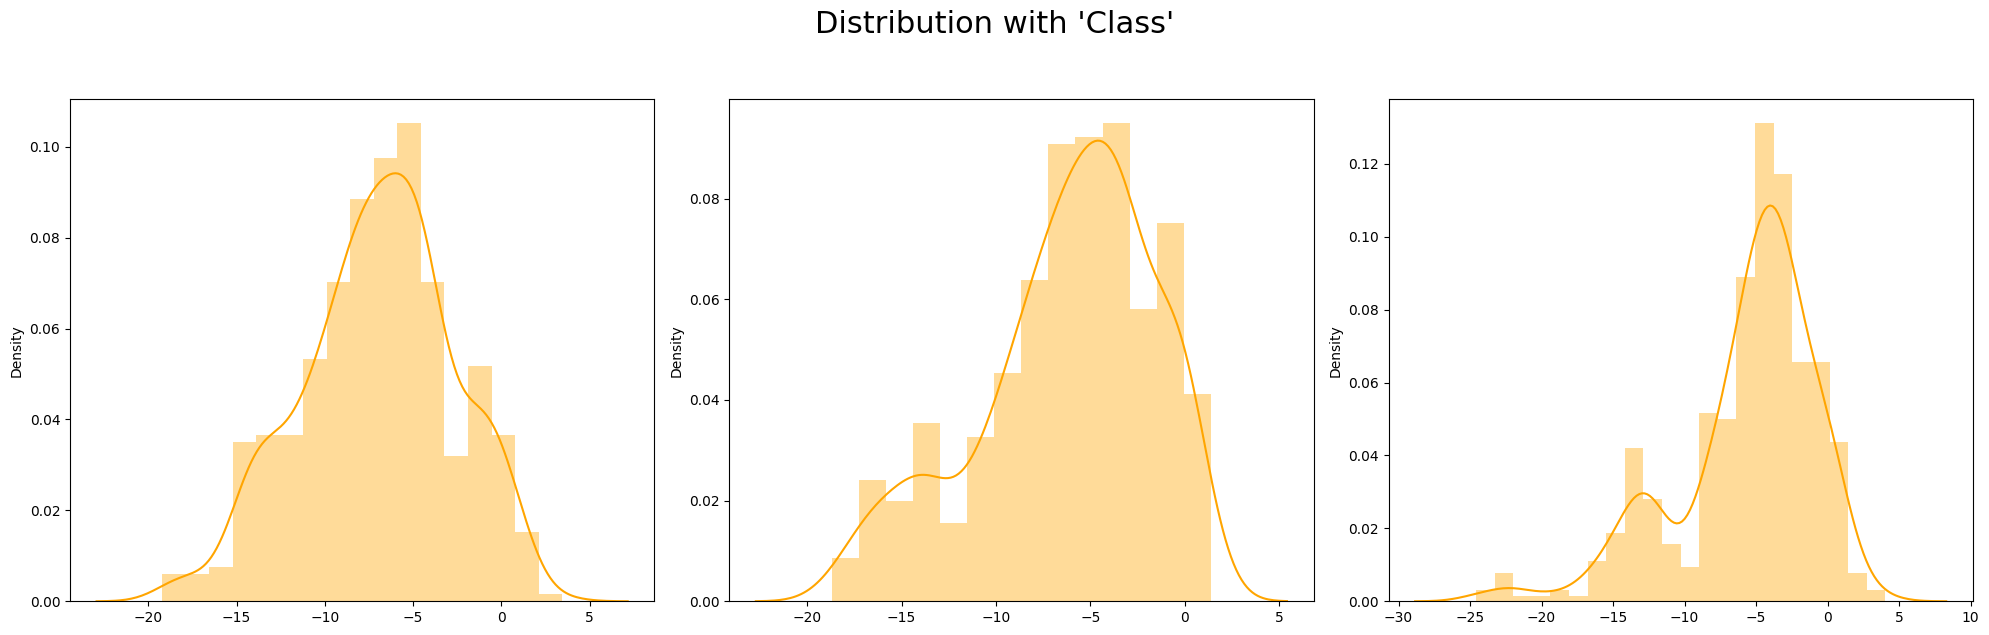

In [21]:
fig, axes = plt.subplots(1,3,figsize=(20,6))

for i,data in enumerate(new_df[['V14','V12','V10']]):
  fraud_dist=new_df[data].loc[new_df['Class']==1].values
  sns.distplot(fraud_dist,ax=axes[i],color='orange',kde=True)

plt.suptitle("Distribution with 'Class'", x=0.5, y=1.05, ha='center', fontsize=22)
plt.tight_layout()
plt.show()

### Capping Outliers


In [22]:
def cap_outlier(value):
  if value < lower_limit:
    return lower_limit
  elif value > upper_limit:
    return upper_limit
  else:
    return value

In [23]:
for i in new_df[['V14','V12','V10']]:
  pcent25=df[i].quantile(0.25)
  pcent75=df[i].quantile(0.75)

  iqr=pcent75-pcent25

  lower_limit=pcent25-1.5*iqr
  upper_limit=pcent75+1.5*iqr

  new_df[i]=new_df[i].apply(cap_outlier)

In [24]:
new_df.shape

(984, 31)

In [25]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

### Using GridSearchCV

In [27]:
models= {
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param_grid' :{
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 3, 4],
            'random_state':[12]
            }
    },
    'XGBClassifer' : {
        'model' : XGBClassifier(),
         'param_grid' : {
             'n_estimators': [50, 100, 200],
             'max_depth': [None, 5, 10, 20, 30],
             'learning_rate': [0.01, 0.1, 0.2],
             'booster': ['gbtree', 'gblinear']
             }
    },
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param_grid' : {
            'max_iter' : [50, 100, 200],
            'penalty' : ['l1','l2'],
            'solver' : ['saga']
            }
    },
    'SVC' : {
        'model' : SVC(),
        'param_grid' : {
            'max_iter' : [50, 100, 200]
        }
    }
    }

In [28]:
results = {}
for model_name, config in models.items():
    grid_search = GridSearchCV(config['model'], config['param_grid'], cv=5, scoring='accuracy', n_jobs=1,error_score='raise')
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_score': grid_search.best_estimator_.score(X_test, y_test)
    }

for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best Cross-Validation Score: {result['best_score']:.4f}")
    print(f"  Test Set Score with Best Model: {result['test_score']:.4f}\n")

Results for RandomForestClassifier:
  Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 12}
  Best Cross-Validation Score: 0.9491
  Test Set Score with Best Model: 0.9289

Results for XGBClassifer:
  Best Parameters: {'booster': 'gbtree', 'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 100}
  Best Cross-Validation Score: 0.9530
  Test Set Score with Best Model: 0.9340

Results for LogisticRegression:
  Best Parameters: {'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
  Best Cross-Validation Score: 0.9454
  Test Set Score with Best Model: 0.9391

Results for SVC:
  Best Parameters: {'max_iter': 100}
  Best Cross-Validation Score: 0.9365
  Test Set Score with Best Model: 0.9340



In [29]:
XGBClassifier=XGBClassifier()
XGBClassifier.fit(X_train,y_train)
y_pred=XGBClassifier.predict(X_test)

In [30]:
print('Accuracy Score', accuracy_score(y_test,y_pred))
print('Cross Validation Score', np.mean(cross_val_score(XGBClassifier,X_train,y_train,cv=10,scoring='accuracy')))

Accuracy Score 0.934010152284264
Cross Validation Score 0.94915611814346


In [31]:
y_predO=XGBClassifier.predict(original_X_test)
print('Accuracy Score', accuracy_score(original_y_test,y_predO))
print(classification_report(original_y_test,y_predO))

Accuracy Score 0.963975351556328
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.98      0.09        98

    accuracy                           0.96     56961
   macro avg       0.52      0.97      0.53     56961
weighted avg       1.00      0.96      0.98     56961



### Oversampling

oversampling is a technique used to address class imbalance in machine learning datasets, particularly when one class (the minority class) is significantly underrepresented compared to the other class(es) (the majority class). In oversampling, the minority class is artificially increased in size to balance the class distribution.

Here's how oversampling typically works:

1. **Identify the Minority Class** : First, you identify the minority class in your dataset. This is the class that has fewer instances compared to the majority class.

2. **Generate Synthetic Samples** : Next, you generate synthetic samples for the minority class to increase its size. This can be done using various techniques, such as SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN (Adaptive Synthetic Sampling).

3. **Create a Balanced Dataset** : After oversampling, you have a new dataset with a balanced class distribution, where both the minority and majority classes have roughly the same number of instances.

In [32]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(original_X_train, original_y_train)

new_df0 = pd.concat([X_resampled, y_resampled], axis=1)

In [33]:
new_df0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454899,-0.282360,-7.807436,5.918635,-9.986436,8.519173,-8.122577,-2.426626,-11.153283,4.932383,-6.412941,...,2.235906,0.307877,0.169836,0.564507,0.005065,0.213218,1.182336,0.198118,1.552344,1
454900,0.725942,1.840677,0.788817,-1.205315,3.930665,0.879040,0.788229,-0.442679,0.307472,-0.674119,...,0.061105,0.254904,0.058448,-0.090343,-0.110480,0.048184,0.039635,0.024625,-0.090686,1
454901,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,-0.293440,1
454902,0.011611,0.113325,1.564917,-3.623163,3.459537,-1.263754,-0.586438,-3.412392,1.048351,-1.969660,...,0.860070,0.489133,-0.192775,-0.661549,0.525000,0.198735,0.800783,0.382106,0.323338,1


<Axes: xlabel='Class', ylabel='count'>

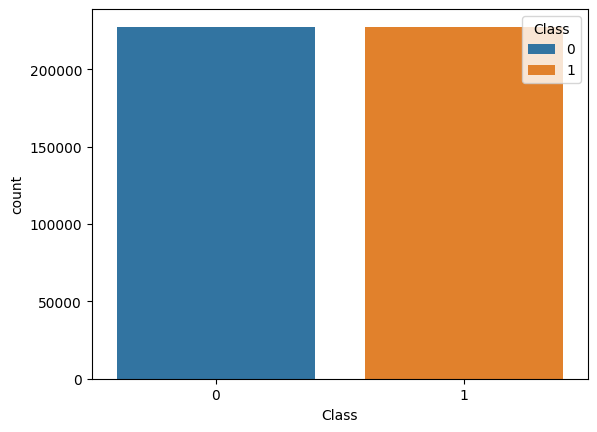

In [34]:
sns.countplot(data=new_df0,x='Class',hue='Class')

<Axes: >

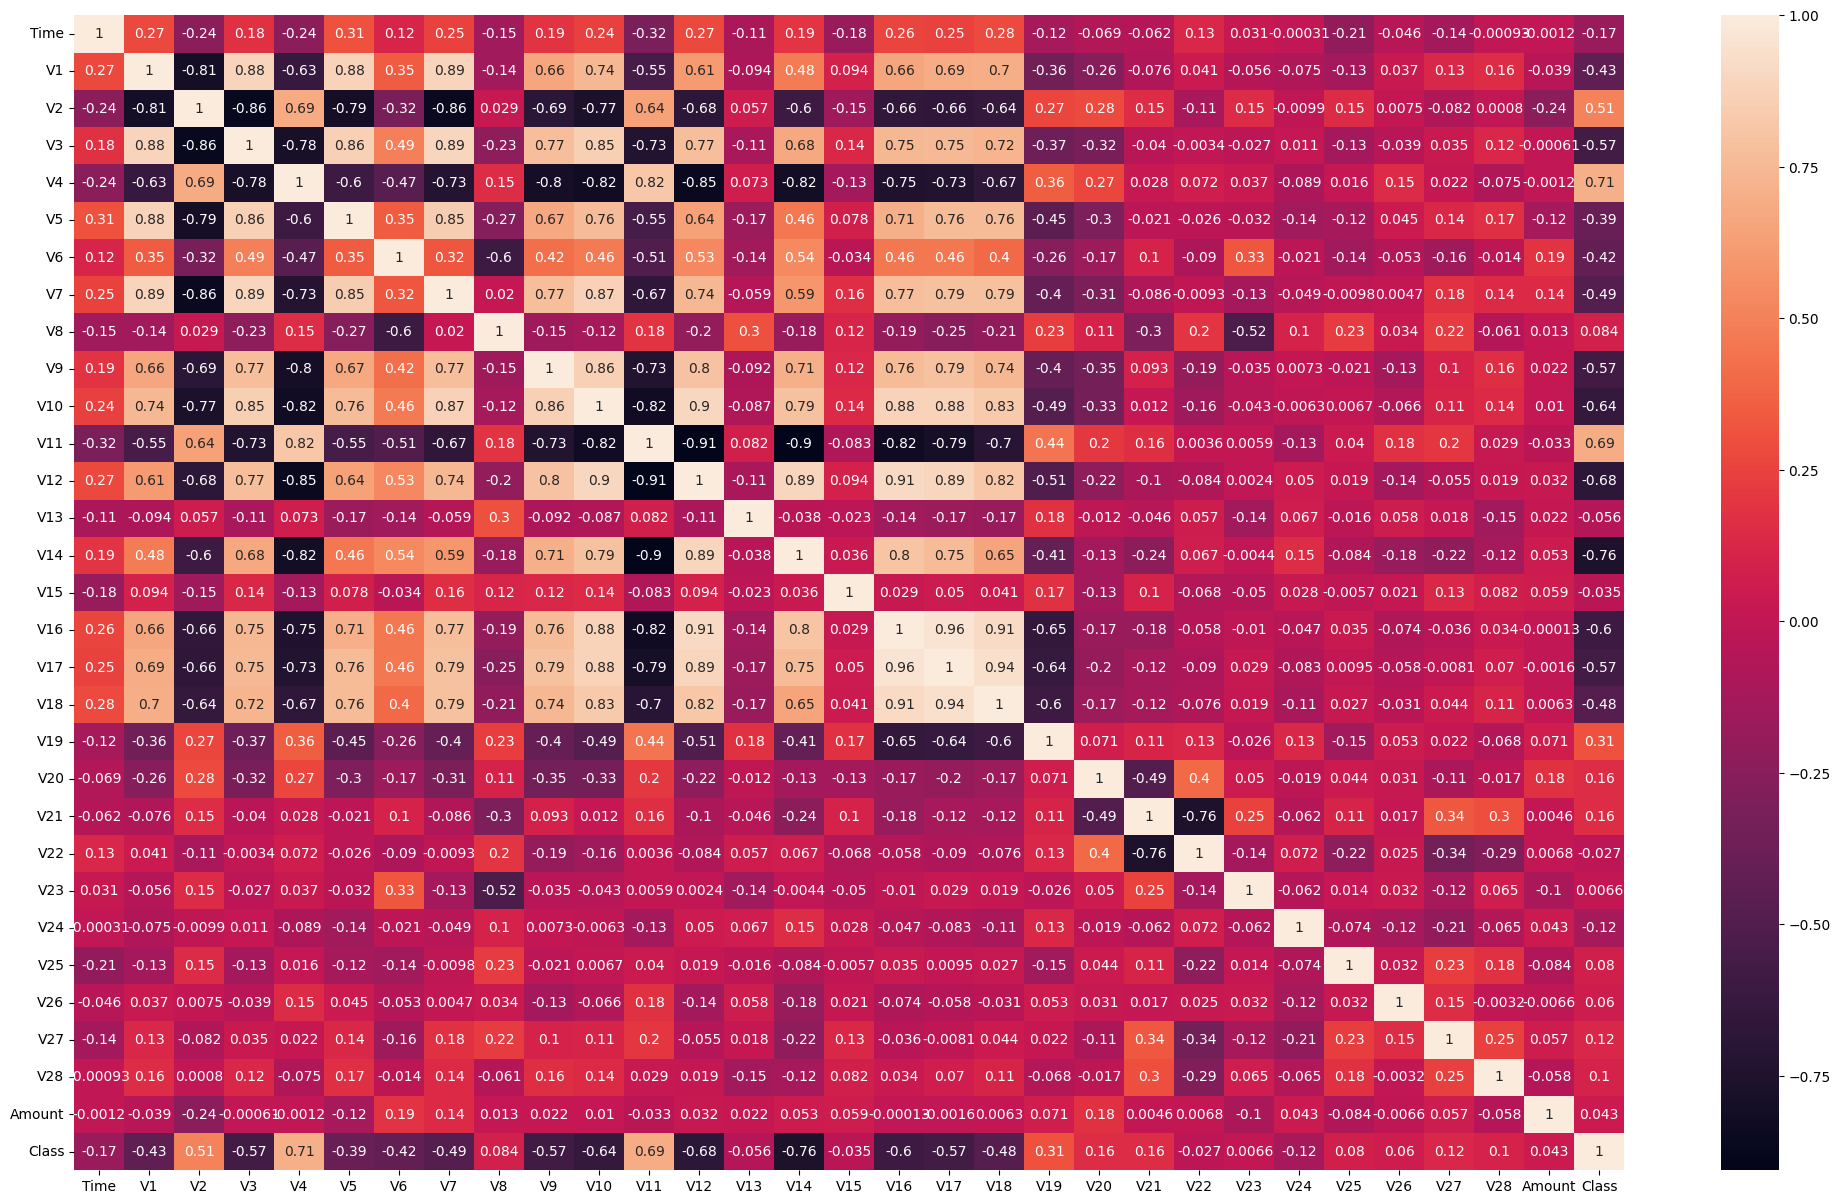

In [35]:
plt.figure(figsize=(25,15))
sns.heatmap(new_df0.corr(), annot=True)

In [36]:
new_df0.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V4        0.709615
V11       0.692572
V2        0.507091
V19       0.311807
V21       0.155815
V20       0.155413
V27       0.122740
V28       0.101493
V8        0.084451
V25       0.079761
V26       0.059768
Amount    0.042579
V23       0.006593
V22      -0.026789
V15      -0.034678
V13      -0.055551
V24      -0.117209
Time     -0.174558
V5       -0.391499
V6       -0.415130
V1       -0.433996
V18      -0.476835
V7       -0.487797
V17      -0.568388
V3       -0.569172
V9       -0.572433
V16      -0.604734
V10      -0.641605
V12      -0.678138
V14      -0.761778
Name: Class, dtype: float64

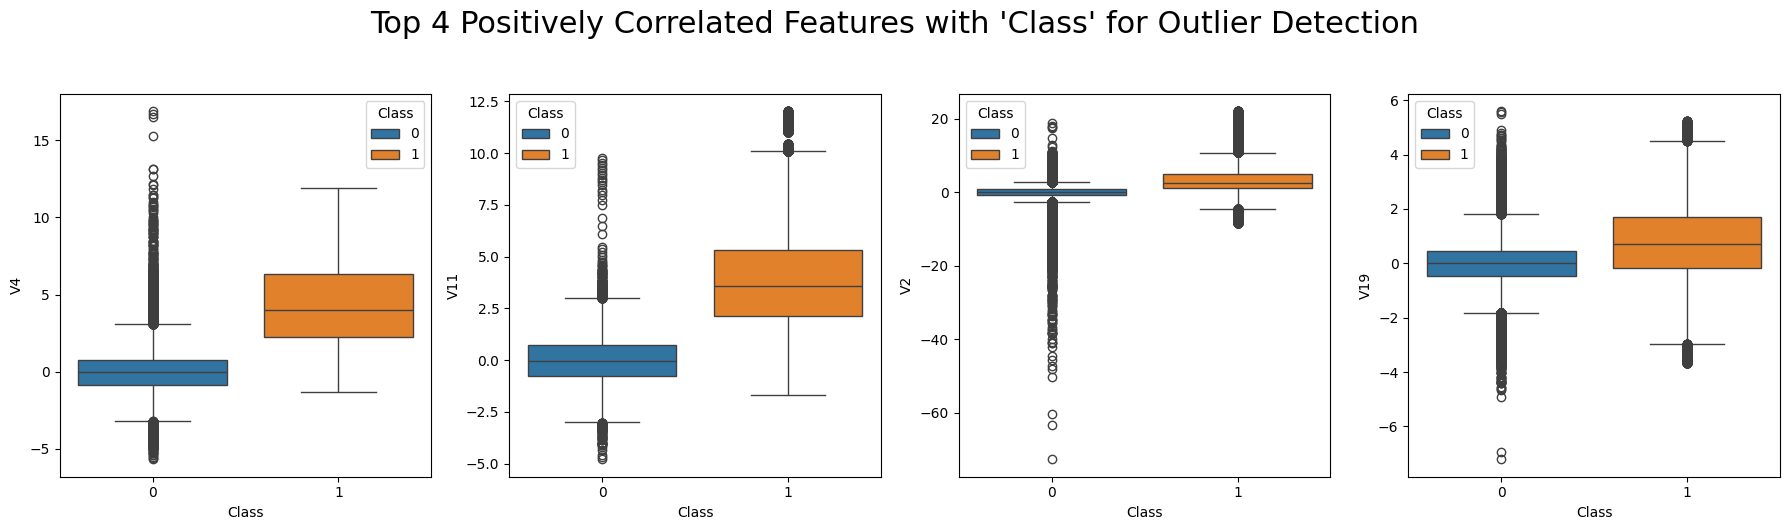

In [37]:
fig, axes = plt.subplots(1,4,figsize=(18,5))

for i,data in enumerate(new_df0[['V4','V11','V2','V19']]):
  sns.boxplot(x=new_df0['Class'],y=new_df0[data],ax=axes[i],hue=new_df0['Class'])

plt.suptitle("Top 4 Positively Correlated Features with 'Class' for Outlier Detection", x=0.5, y=1.05, ha='center', fontsize=22)
plt.tight_layout()
plt.show()

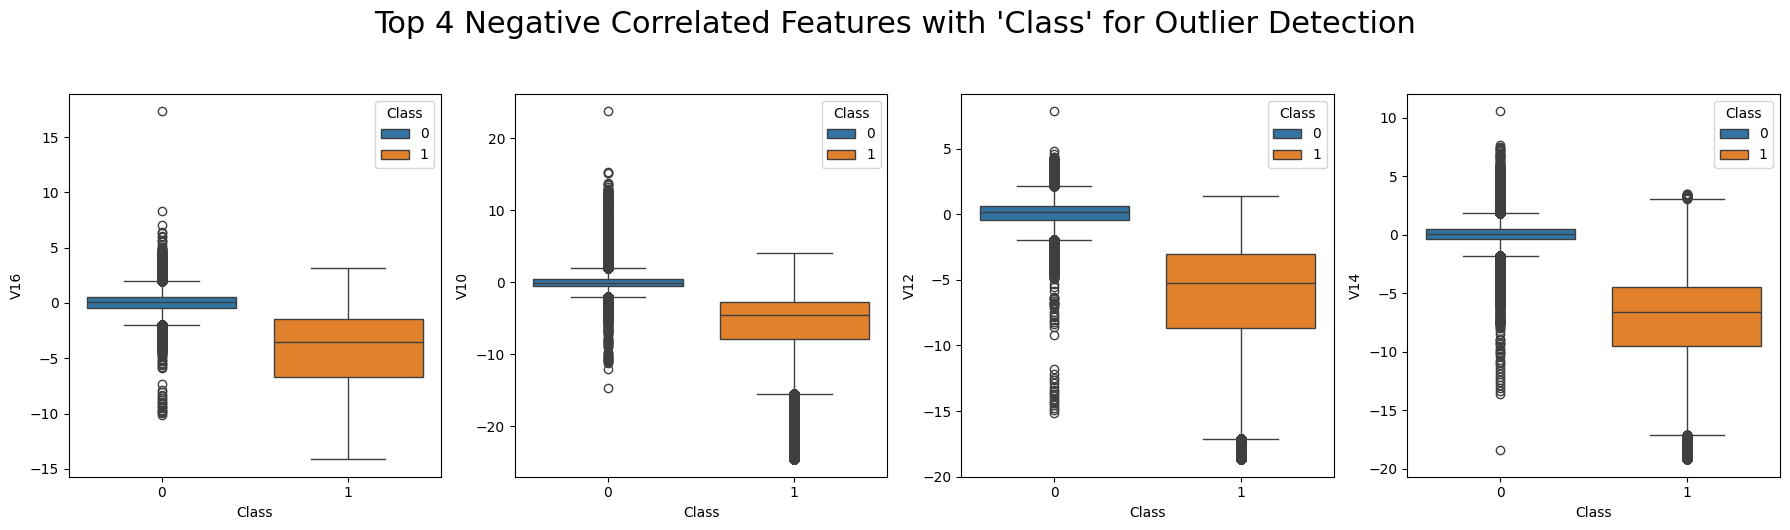

In [38]:
fig, axes = plt.subplots(1,4,figsize=(18,5))

for i,data in enumerate(new_df0[['V16','V10','V12','V14']]):
  sns.boxplot(x=new_df0['Class'],y=new_df0[data],ax=axes[i],hue=new_df0['Class'])

plt.suptitle("Top 4 Negative Correlated Features with 'Class' for Outlier Detection", x=0.5, y=1.05, ha='center', fontsize=22)
plt.tight_layout()
plt.show()

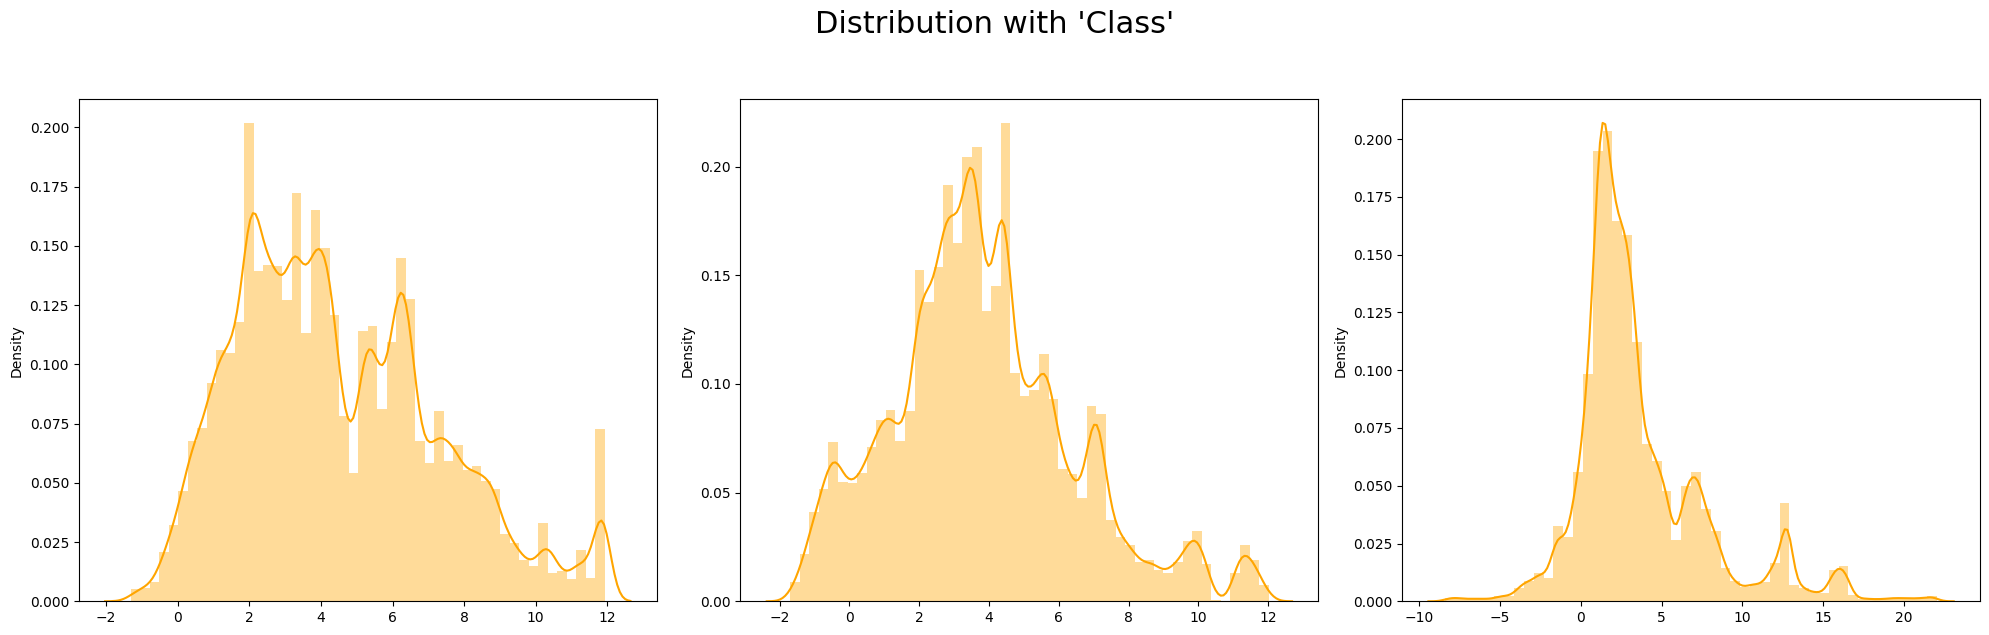

In [39]:
fig, axes = plt.subplots(1,3,figsize=(20,6))

for i,data in enumerate(new_df0[['V4','V11','V2']]):
  fraud_dist=new_df0[data].loc[new_df0['Class']==1].values
  sns.distplot(fraud_dist,ax=axes[i],color='orange',kde=True)

plt.suptitle("Distribution with 'Class'", x=0.5, y=1.05, ha='center', fontsize=22)
plt.tight_layout()
plt.show()

In [40]:
for i in new_df0[['V4','V11','V2']]:
  pcent25=df[i].quantile(0.25)
  pcent75=df[i].quantile(0.75)

  iqr=pcent75-pcent25

  lower_limit=pcent25-1.5*iqr
  upper_limit=pcent75+1.5*iqr

  new_df0[i]=new_df0[i].apply(cap_outlier)

In [41]:
X = new_df0.drop('Class', axis=1)
y = new_df0['Class']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=12)

In [43]:
RandomForestClassifier=RandomForestClassifier(random_state=12)
RandomForestClassifier.fit(X_train,y_train)
y_predS=RandomForestClassifier.predict(X_test)
print('Accuracy Score', accuracy_score(y_test,y_predS))
print(classification_report(y_test,y_predS))

Accuracy Score 0.9999340521647377
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45363
           1       1.00      1.00      1.00     45618

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981



In [44]:
y_predO1=RandomForestClassifier.predict(original_X_test)
print('Accuracy Score', accuracy_score(original_y_test,y_predO1))
print(classification_report(original_y_test,y_predO1))

Accuracy Score 0.9994733238531627
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.83      0.84        98

    accuracy                           1.00     56961
   macro avg       0.93      0.91      0.92     56961
weighted avg       1.00      1.00      1.00     56961



This classification report provides evaluation metrics for a binary classification model. Here's a breakdown of the metrics:

**Precision** : Precision measures the accuracy of the positive predictions made by the model. A precision of 1.00 for class 0 means that all the instances predicted as class 0 are actually class 0. For class 1, precision of 0.86 indicates that 86% of the instances predicted as class 1 are actually class 1.

**Recall** : Recall (also known as sensitivity or true positive rate) measures the proportion of actual positive instances that were correctly predicted by the model. A recall of 1.00 for class 0 means that all the actual class 0 instances were correctly identified. For class 1, a recall of 0.83 indicates that 83% of the actual class 1 instances were correctly identified.

**F1-score** : The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1-score indicates good performance in both precision and recall. The F1-score for class 1 is 0.85, indicating a good balance between precision and recall for class 1.

**Support** : Support refers to the number of actual occurrences of each class in the dataset.

**Accuracy** : Accuracy measures the overall correctness of the model's predictions. In this case, the model has an accuracy of 1.00, indicating that it correctly predicted the class for all instances in the dataset.

**Macro Average** : The macro average calculates the unweighted average of precision, recall, and F1-score across both classes. It gives equal weight to each class, regardless of its size.

**Weighted Average** : The weighted average calculates the average of precision, recall, and F1-score, weighted by the support of each class. It gives higher weight to classes with more instances.

Overall, this classification report suggests that the model performs well, achieving high accuracy and a good balance between precision and recall for both classes. However, it's important to consider the specific requirements of the task and the class distribution when interpreting these metrics.





